### Agentic ai 


In [1]:
import os 
from dotenv import load_dotenv 
from rich import print
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm= ChatGroq(model="llama-3.3-70b-versatile")

In [3]:
print(llm.invoke("hi explain me about Groq platform ").content)

The Groq platform is a high-performance computing platform designed for artificial intelligence (AI) and machine 
learning (ML) workloads. Here's an overview:

**What is Groq?**
Groq is a startup company founded in 2016, focused on developing a new type of computing platform that can 
efficiently handle complex AI and ML computations. The company was founded by Jonathan Ross, who previously worked 
at Google on the Tensor Processing Unit (TPU) project.

**Key Features:**

1. **Tensor Processing**: Groq's platform is designed to accelerate tensor computations, which are the core of many
AI and ML algorithms. Tensors are multi-dimensional arrays used to represent complex data structures.
2. **High-Performance Computing**: The Groq platform is optimized for high-performance computing, with a focus on 
low latency and high throughput.
3. **Custom ASIC**: Groq has developed a custom Application-Specific Integrated Circuit (ASIC) designed 
specifically for AI and ML workloads. This ASIC provides a significant boost in performance and efficiency compared
to traditional CPUs and GPUs.
4. **Software Framework**: Groq provides a software framework that allows developers to easily integrate their AI 
and ML models with the platform.

**How does it work?**
The Groq platform consists of several components:

1. **Groq Chip**: The custom ASIC chip is the core of the platform, providing the high-performance computing 
capabilities.
2. **Groq Card**: The Groq Card is a PCIe card that contains the Groq Chip and provides a interface to the host 
system.
3. **Software Framework**: The software framework provides a set of APIs and tools that allow developers to compile
and run their AI and ML models on the Groq platform.

**Benefits:**
The Groq platform offers several benefits, including:

1. **High Performance**: The platform provides significant performance improvements for AI and ML workloads, 
reducing latency and increasing throughput.
2. **Low Power Consumption**: The custom ASIC design and optimized software framework result in lower power 
consumption compared to traditional computing platforms.
3. **Easy Integration**: The software framework makes it easy for developers to integrate their AI and ML models 
with the Groq platform.

**Target Markets:**
The Groq platform is designed for various markets, including:

1. **Data Centers**: The platform is optimized for data center deployments, providing high-performance computing 
capabilities for cloud-based AI and ML services.
2. **Edge Computing**: The platform is also suitable for edge computing applications, such as autonomous vehicles, 
smart homes, and industrial automation.
3. **Research and Development**: The Groq platform is used by researchers and developers to accelerate AI and ML 
research and development.

Overall, the Groq platform is a powerful tool for accelerating AI and ML workloads, providing high-performance 
computing capabilities, low power consumption, and easy integration.

In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_ollama import OllamaEmbeddings 
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
urls=[
    "https://docs.langchain.com/oss/python/langchain/overview",
    "https://docs.langchain.com/oss/python/langchain/agents",
    "https://docs.langchain.com/oss/python/langchain/structured-output"
]

In [6]:
docs=[WebBaseLoader(url).load() for url in urls]

In [7]:
doc_list=[doc for sublist in docs for doc in sublist]

In [8]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
doc_splits=text_splitter.split_documents(doc_list)

In [9]:
print(doc_splits[:2])

[
    Document(
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/overview',
            'title': 'LangChain overview - Docs by LangChain',
            'language': 'en'
        },
        page_content="LangChain overview - Docs by LangChainSkip to main contentWe've raised a $125M Series B to 
build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + 
LangGraphSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep 
AgentsIntegrationsLearnReferenceContributePythonOverviewLangChain v1.0Release notesMigration guideGet 
startedInstallQuickstartPhilosophyCore componentsAgentsModelsMessagesToolsShort-term 
memoryStreamingMiddlewareStructured outputAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol 
(MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryUse in productionStudioTestDeployAgent Chat 
UIObservabilitycloseOn this page Install Create an agent Core benefitsLangChain overviewCopy pageCopy pageLangChain
v1.0 is now available!For a complete list of changes and instructions on how to upgrade your code, see the release 
notes and migration guide.If you encounter any issues or have feedback,"
    ),
    Document(
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/overview',
            'title': 'LangChain overview - Docs by LangChain',
            'language': 'en'
        },
        page_content='your code, see the release notes and migration guide.If you encounter any issues or have 
feedback, please open an issue so we can improve. To view v0.x documentation, go to the archived content.'
    )
]

In [10]:
vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OllamaEmbeddings(model="llama3:8b")
)

retriever=vectorstore.as_retriever()

In [11]:
print(retriever.invoke("what is Structured output ?"))

[
    Document(
        id='a5fb9026-6083-4ef6-a096-c0f711d50330',
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/structured-output',
            'title': 'Structured output - Docs by LangChain',
            'language': 'en'
        },
        page_content='If handle_errors is a tuple of exceptions, the agent will only retry (using the default error
message) if the exception raised is one of the specified types. In all other cases, the exception will be 
raised.\nCustom error handler function:\nCopyAsk AIdef custom_error_handler(error: Exception) -> str:\n    if 
isinstance(error, StructuredOutputValidationError):\n        return "There was an issue with the format. Try 
again.\n    elif isinstance(error, MultipleStructuredOutputsError):\n        return "Multiple structured outputs 
were returned. Pick the most relevant one."\n    else:\n        return f"Error: {str(error)}"\n\nToolStrategy(\n   
schema=ToolStrategy(Union[ContactInfo, EventDetails]),\n    handle_errors=custom_error_handler\n)\n\nOn 
StructuredOutputValidationError:\nCopyAsk AI================================= Tool Message 
=================================\nName: ToolStrategy\n\nThere was an issue with the format. Try again.'
    ),
    Document(
        id='b6b9228e-6c98-4bb7-8417-a3ee499e4eae',
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/structured-output',
            'title': 'Structured output - Docs by LangChain',
            'language': 'en'
        },
        page_content='strategiesCore componentsStructured outputCopy pageCopy pageStructured output allows agents 
to return data in a specific, predictable format. Instead of parsing natural language responses, you get structured
data in the form of JSON objects, Pydantic models, or dataclasses that your application can directly use.'
    ),
    Document(
        id='180c63fa-33d2-42b0-8997-c64bc952ebb2',
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/agents',
            'title': 'Agents - Docs by LangChain',
            'language': 'en'
        },
        page_content='agent = create_agent(\n    model,\n    tools=tools,\n    
middleware=[CustomMiddleware()]\n)\n\n# The agent can now track additional state beyond messages\nresult = 
agent.invoke({\n    "messages": [{"role": "user", "content": "I prefer technical explanations"}],\n    
"user_preferences": {"style": "technical", "verbosity": "detailed"},\n})\n\n\u200bDefining state via 
state_schema\nUse the state_schema parameter as a shortcut to define custom state that is only used in 
tools.\nCopyAsk AIfrom langchain.agents import AgentState\n\n\nclass CustomState(AgentState):\n    
user_preferences: dict\n\nagent = create_agent(\n    model,\n    tools=[tool1, tool2],\n    
state_schema=CustomState\n)\n# The agent can now track additional state beyond messages\nresult = agent.invoke({\n 
"messages": [{"role": "user", "content": "I prefer technical explanations"}],\n    "user_preferences": {"style": 
"technical", "verbosity": "detailed"},\n})'
    ),
    Document(
        id='fd8cdb59-004b-4d68-a192-242a51560f45',
        metadata={
            'source': 'https://docs.langchain.com/oss/python/langchain/structured-output',
            'title': 'Structured output - Docs by LangChain',
            'language': 'en'
        },
        page_content='If handle_errors is a string, the agent will always prompt the model to re-try with a fixed 
tool message:\nCopyAsk AI================================= Tool Message =================================\nName: 
ProductRating\n\nPlease provide a valid rating between 1-5 and include a comment.\n\nHandle specific exceptions 
only:\nCopyAsk AIToolStrategy(\n    schema=ProductRating,\n    handle_errors=ValueError  # Only retry on 
ValueError, raise others\n)\n\nIf handle_errors is an exception type, the agent will only retry (using the default 
error message) if the exception raised is the sp

In [12]:
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "search and run information about langchain.")

In [13]:
print(retriever_tool)

Tool(
    name='retriever_vector_db_blog',
    description='search and run information about langchain.',
    args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>,
    func=functools.partial(<function _get_relevant_documents at 0x0000025B4F241C60>, 
retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], 
vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000025B4F2019A0>, search_kwargs={}), 
document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, 
template='{page_content}'), document_separator='\n\n', response_format='content'),
    coroutine=functools.partial(<function _aget_relevant_documents at 0x0000025B4F243740>, 
retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], 
vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000025B4F2019A0>, search_kwargs={}), 
document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, 
template='{page_content}'), document_separator='\n\n', response_format='content')
)

In [14]:
## another vector database for langgraph 

urls=[
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/thinking-in-langgraph",
    "https://docs.langchain.com/oss/python/langgraph/workflows-agents"
]

In [15]:
docs=[WebBaseLoader(doc).load() for doc in urls]

In [16]:
doc_list=[items for sublist in docs for items in sublist ]

In [17]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)

In [18]:
doc_splits=text_splitter.split_documents(doc_list)

In [19]:
vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OllamaEmbeddings(model="llama3:8b")
)

In [20]:
retriever=vectorstore.as_retriever()

In [21]:
retriever_tool2=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog2",
    "search and run information about langraph."
)

In [22]:
tools=[retriever_tool,retriever_tool2]

In [23]:
## Graph work flow 

from langgraph.graph import StateGraph,END,START
from typing_extensions import TypedDict 
from typing import Annotated,Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [24]:
from langchain_ollama import ChatOllama

model = ChatGroq(model="qwen/qwen3-32b")

In [25]:
print(model.invoke("what is ollama?"))

AIMessage(
    content="<think>\nOkay, the user is asking about what Ollama is. I need to start by recalling what I know about
Ollama. I remember that it's related to large language models, maybe something like LLaMA but open-source or a 
different approach. Let me think.\n\nOllama is a company that developed a tool or framework for running large 
language models locally. They have their own model called Ollama, which is based on LLaMA and Llama 2. The main 
idea is to allow users to run these models on their own devices without needing a cloud service. That's useful for 
privacy and cost reasons.\n\nI should mention that Ollama provides a CLI and API for interacting with the models, 
making it easy to set up. They also support various models, not just their own, which adds versatility. The user 
might be interested in how it compares to other tools like Docker or Colab. Perhaps they're looking to deploy 
models locally for a project or personal use.\n\nWait, there's also the part about creating and sharing models. 
Ollama allows users to train their own models or fine-tune existing ones. That's a key feature for customization. I
should highlight the ease of use, since Ollama is designed to be user-friendly, which is a big plus for developers 
and researchers.\n\nI need to make sure I don't confuse Ollama with other projects like llama.cpp or other local 
model runners. Ollama is a specific product with its own ecosystem. Also, mentioning the open-source aspect might 
be important, but I should verify if their models are open-source. Llama 2 is open, but Ollama's models might be 
their own version.\n\nLet me structure this: start with a definition, then key features like local deployment, 
supported models, CLI/API, model creation, and use cases. Maybe add a note on performance and resource usage, but 
I'm not sure about the exact specs. Also, check if there are any limitations, like hardware requirements for 
running models locally.\n\nThe user might be a developer or researcher looking for a way to test models locally, or
someone concerned about data privacy. They might want to know if Ollama is suitable for production use or just 
experimentation. I should keep the explanation clear and not too technical, but still cover the main points they'd 
need to know.\n</think>\n\n**Ollama** is a local AI model runner and framework designed to simplify the deployment 
and use of large language models (LLMs) on personal devices or local servers. It enables users to run, manage, and 
interact with open-source LLMs like **Llama 2**, **Phi-2**, and others without relying on cloud services, 
emphasizing privacy, cost-effectiveness, and flexibility.\n\n---\n\n### **Key Features of Ollama**:\n1. **Local 
Model Execution**:\n   - Runs models directly on your machine (via GPU or CPU) without cloud dependency.\n   - 
Supports popular open-source models like **Llama 2** and **Phi-2** out of the box.\n\n2. **Ease of Use**:\n   - 
Provides a simple **command-line interface (CLI)** and **REST API** for setup and interaction.\n   - No complex 
configurations or infrastructure required.\n\n3. **Model Creation & Sharing**:\n   - Allows users to **train, 
fine-tune, or merge models** using tools like `ollama create`.\n   - Models can be shared locally or distributed to
others.\n\n4. **Cross-Platform Support**:\n   - Works on **Windows, macOS, and Linux**.\n   - Lightweight and 
optimized for performance, even on consumer-grade hardware.\n\n5. **Privacy-Focused**:\n   - Data remains on your 
device, avoiding the need to send it to external services.\n\n---\n\n### **How It Works**:\n- **Download Models**: 
Use `ollama pull` to fetch pre-trained models (e.g., `ollama pull llama2`).\n- **Run Models**: Execute models 
locally via `ollama run` and interact with prompts.\n- **Extend Capabilities**: Use the API to integrate models 
into applications or workflows.\n\n---\n\n### **Use Cases**:\n- **Prototyping**: Quickly test AI ideas without 
cloud costs.\n- *

In [34]:
def agent(state):
    """ 
    Invokes the agent model to generate a response based on the current state . Given the question,  it
    will decide to retrieve using retriever tool or simply end.

    Args : 
        state(messages) : the current state

    returns: 
        dict : the updated state with the agent response appended to messages
    """

    print("-- Call Agent -- ")
    messages=state["messages"]
    llm= ChatGroq(model="llama-3.3-70b-versatile")
    model=llm.bind_tools(tools)
    response=model.invoke(messages)
    return {"messages": [response]}


In [35]:
from langchain_classic import hub
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_ollama import ChatOllama
from langchain_groq import ChatGroq
from typing import Annotated,Literal,Sequence
from typing_extensions import TypedDict
from pydantic import BaseModel, Field 

In [36]:
## Edges 

def grade_documents(state)->Literal["generate","rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the queston.

    Args : 
        str: A decision for whether the documents are relevant or not.
    
    Returns:
        str : A decision for whether the documents are relevant or not
    """

    print("---Check relevance---")

    class grade(BaseModel):
        """ Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM 
    llm= ChatGroq(model="llama-3.3-70b-versatile")

    ## llm with tool and validation
    llm_with_tools=llm.with_structured_output(grade)

    # Prompt 
    prompt=PromptTemplate(
        template=""" 
                    you are a grader assessing relevance of a retrieved document to a
                    user question. \n
                    here is the retrieved document: \n\n{context}\n\n
                    here is the user question: {question} \n
                    if the documents contain keywords or semantic meaning related to the user question, grade it as relevant.\n
                    give binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
                """,
                input_variables=["context","question"],
    )
    # Chain
    chain=prompt | llm_with_tools

    messages=state['messages']
    last_message=messages[-1]

    question=messages[0]
    docs=last_message.content

    scored_result=chain.invoke({'question':question,"context":docs})

    score=scored_result.binary_score

    if score == "yes":
        print("---Decision : Docs relevant ---")
        return "generate"
    else:
        print("---Decision : Docs are not relevant---")
        print(score)
        return "rewrite"

In [37]:
def generate(state):
    """ 
     Generate answer 

     Args : 
            state(message):the current state
        returns: 
        dict: the updated message 
    """

    print("--- generated---")

    messages=state["messages"]
    question=messages[0].content
    last_message=messages[-1]
    docs=last_message.content

     # prompt 
    prompt=hub.pull("rlm/rag-prompt")

     # llm 
    llm= ChatGroq(model="llama-3.3-70b-versatile")

     # post-processing 
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    

    # Chain
    rag_chain=prompt | llm | StrOutputParser()

    # run 
    response=rag_chain.invoke({"context":docs,"question":question})
    return {"messages":[response]} 

In [38]:
def rewrite(state):
    """ 
    Transform the query to produce a better quesion.

    Args: 
        state (messages): the current state.

    returns : 
            dict : the updated state with re-phrased question. 
    """

    print("---Transform Query---")
    messages=state['messages']
    question=messages[0].content

    msg=[

        HumanMessage(
            content=f"""\n 
            look at the input and try to reason about the underlying semantic intent / meaning. \n 
            Here is the initial question:
            \n------\n
            {question}
            \n-----\n
            Formulate an improved question: 
                """,
        )
    ]

    # Grader 
    model= ChatGroq(model="llama-3.3-70b-versatile")
    response=model.invoke(msg)
    return {"messages":[response]}

In [43]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition

builder=StateGraph(AgentState)

# lets add nodes 
builder.add_node('agent',agent)
retriever=ToolNode([retriever_tool,retriever_tool2])
builder.add_node('retriever',retriever)
builder.add_node("rewrite",rewrite)
builder.add_node("generate",generate)

# lets build workflow 
builder.add_edge(START,"agent")
builder.add_conditional_edges("agent",tools_condition,{"tools":"retriever",END:END,},)
builder.add_conditional_edges("retriever",grade_documents,{"rewrite":"rewrite","generate":"generate"})
builder.add_edge("generate",END)
builder.add_edge("rewrite","agent")


graph=builder.compile()


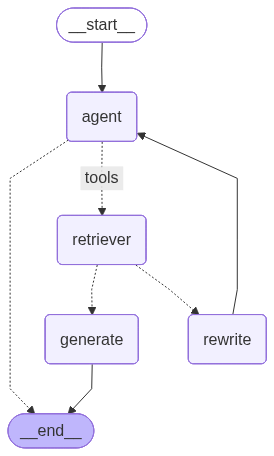

In [52]:
from IPython.display import display,Image
display(Image(graph.get_graph(xray=True).draw_mermaid_png(output_file_path="output.png")))

In [53]:
graph.invoke({'messages':"What is langraph ? "})

-- Call Agent --

---Check relevance---

---Decision : Docs relevant ---

--- generated---

{'messages': [HumanMessage(content='What is langraph ? ', additional_kwargs={}, response_metadata={}, id='cf4a3099-f305-433c-92cd-20d3ed4766af'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0krmm252c', 'function': {'arguments': '{"query":"what is langraph"}', 'name': 'retriever_vector_db_blog2'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 311, 'total_tokens': 333, 'completion_time': 0.036063638, 'prompt_time': 0.015944516, 'queue_time': 0.053385294, 'total_time': 0.052008154}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_0ca3f8c386', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--5b8dff7e-a85b-4f01-94cf-20cf0a8241d0-0', tool_calls=[{'name': 'retriever_vector_db_blog2', 'args': {'query': 'what is langraph'}, 'id': '0krmm252c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 311, 'output_tokens': 22, 'total_token